<a href="https://colab.research.google.com/github/jessamcs/Sales-Repository/blob/main/SalesPredictionFinalPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize libraries and load dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/sales_predictions.csv')
df['Item_Weight'].fillna(0, inplace = True)
df['Outlet_Size'].fillna("NA", inplace = True)

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

## Create Test-Train-Split

In [3]:
# The target we are trying to predict
y = df['Item_Outlet_Sales']
# The features we will use to make the prediction
X = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Item_Outlet_Sales'])

# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NA,Supermarket Type1
...,...,...,...,...,...,...,...
5734,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,NA,Grocery Store
5191,15.600,Low Fat,0.117575,Frozen Foods,75.6670,NA,Supermarket Type1
5390,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,NA,Supermarket Type1
860,20.350,Low Fat,0.054363,Snack Foods,117.9466,NA,Supermarket Type1


## Cleaning up the data

In [5]:
# Imports
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from math import remainder

#instantiate preprocessing objects
median_imputer = SimpleImputer(strategy = 'median')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#make categorical and numeric selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


# #select the numeric columns of each type
# num_columns = num_selector(X_train)
# cat_columns = cat_selector(X_train)
# #check our lists
# print('numeric columns are', num_columns)
# print('categorical columns are', cat_columns)


# This is the pipeline for numeric columns
num_pipe = make_pipeline(median_imputer, scaler)
# Thius is the pipeline for categorical columns
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

column_transformer = make_column_transformer(num_tuple, cat_tuple)

In [6]:
column_transformer.fit(X_train)

X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

## Initialize and create the linear model

In [7]:
from sklearn.linear_model import LinearRegression
# Make a linear regression instance
model = LinearRegression()
model.fit(X_train_processed, y_train)
train_score = model.score(X_train_processed, y_train)
print(train_score)
test_score = model.score(X_test_processed, y_test)
print(test_score)

0.5607702224073545
0.5657384999706216


## Start Evaluating the performance of the model using linear regression

In [8]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# get predictions for R^2 score
predictions_train = model.predict(X_train_processed)
print(r2_score(y_train, predictions_train))

predictions_test = model.predict(X_test_processed)
print(r2_score(y_test, predictions_test))

0.5607702224073545
0.5657384999706216


In [9]:
# get predictions for RMSE score
print(np.sqrt(mean_squared_error(y_train, predictions_train)))
print(np.sqrt(mean_squared_error(y_test, predictions_test)))

1140.1232700434134
1094.5855907830614


## Initialize the regression tree model

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

## Start Evaluating the performance of the model using regression tree model

In [11]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [12]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.19884261477497678


In [13]:
# Checking and optimizing the depth of the tree
max_depth_range = list(range(2, 36)) 
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

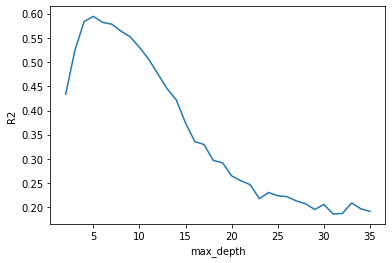

In [14]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [15]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6038914632112735
0.5946549464029989


### Overall regression tree model has a better scoring over linear regression model - Given the same processed test-train-split data used.